# Importing Required Libraries

In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

---

# DATA CLEANING

## importing data set

In [5]:
#I had a problem accessing the dataset as a csv file, so I loaded it into an excel file and it have worked

In [9]:
df = pd.read_excel('test.xlsx')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [11]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,0.0,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1.0,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,0.0,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,0.0,NaN,NaN


## Exploring and cleaning the DATA

In [13]:
# first , I dropped the unneccesary columns to reduce the dimensions of the data
df.drop(['index','Unnamed: 22'], axis=1, inplace=True)

In [15]:
df.describe()

,Qty,Amount,ship-postal-code,B2B
count,128975.000000,121180.000000,128940.000000,128973.000000
mean,0.904431,648.561465,463969.927594,0.006753
std,0.313354,281.211687,191475.956294,0.081901
min,0.000000,0.000000,110001.000000,0.000000
25%,1.000000,449.000000,382421.000000,0.000000
50%,1.000000,605.000000,500033.000000,0.000000
75%,1.000000,788.000000,600024.000000,0.000000
max,15.000000,5584.000000,989898.000000,1.000000


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,128977,120379,171-5057375-2831560,12
Date,128977,92,05-03-22,2085
Status,128977,14,Shipped,77804
Fulfilment,128977,4,Amazon,89698
Sales Channel,128977,3,Amazon.in,128851
ship-service-level,128977,3,Expedited,88615
Style,128977,1378,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [19]:
#I think this column is not necessary as It has only Easy ship or null so i deleted it
df.drop(['fulfilled-by'], axis=1, inplace=True)

In [21]:
#exploring the data set in a nutshell 
df.shape

(128977, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128977 non-null  object 
 1   Date                128977 non-null  object 
 2   Status              128977 non-null  object 
 3   Fulfilment          128977 non-null  object 
 4   Sales Channel       128977 non-null  object 
 5   ship-service-level  128977 non-null  object 
 6   Style               128977 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  float64
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [129]:
# I have noticed that the Date columns is typed as object so I changed it
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.rename(columns={'Amount':'Price-INR',
                   'Sales Channel':'Sales-Channel',
                   'Qty':'Quantity',
                   'Order ID':'ID',
                   'Courier Status':'Courier-Status'}, inplace=True)

In [29]:
df['ship-postal-code'] = df['ship-postal-code'].astype('object')

In [31]:
#as I have changed the price column and provided it with the currency 
#So, The currency columns became unnecessary
df.drop(['currency'], axis=1, inplace=True)

In [33]:
df['Courier-Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [35]:
df.loc[df['Quantity']==0,'Courier-Status'] = 'Cancelled'

In [37]:
df.loc[df['Courier-Status']=='Cancelled','Price-INR'] = 0

In [39]:
df.isna().sum()

ID                        0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier-Status            2
Quantity                  2
Price-INR               126
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
dtype: int64

In [41]:
df = df.drop_duplicates()

In [43]:
df = df.dropna(subset=['Date'])

In [45]:
df = df.dropna(subset=['Price-INR','ship-state'])

In [47]:
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

In [49]:
df['Total'] = df['Quantity'] * df['Price-INR']

### Visualize the distribution of key features to identify trends and patterns.

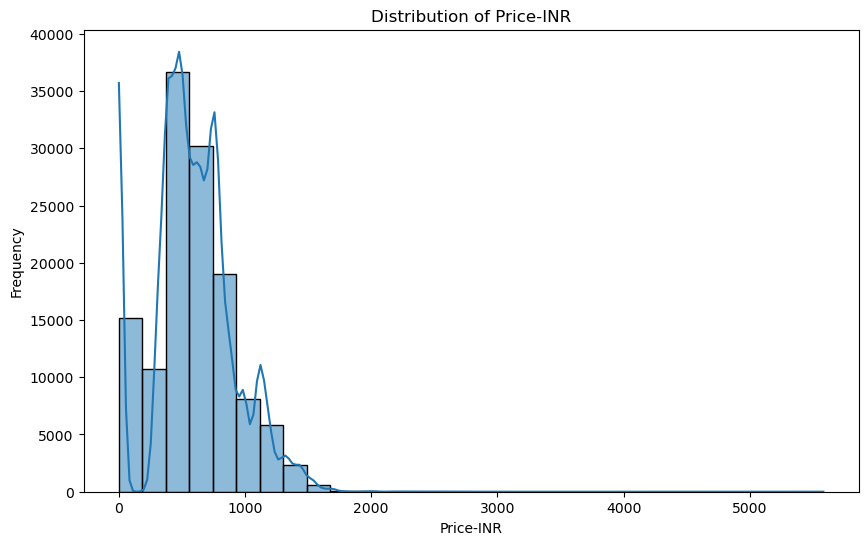

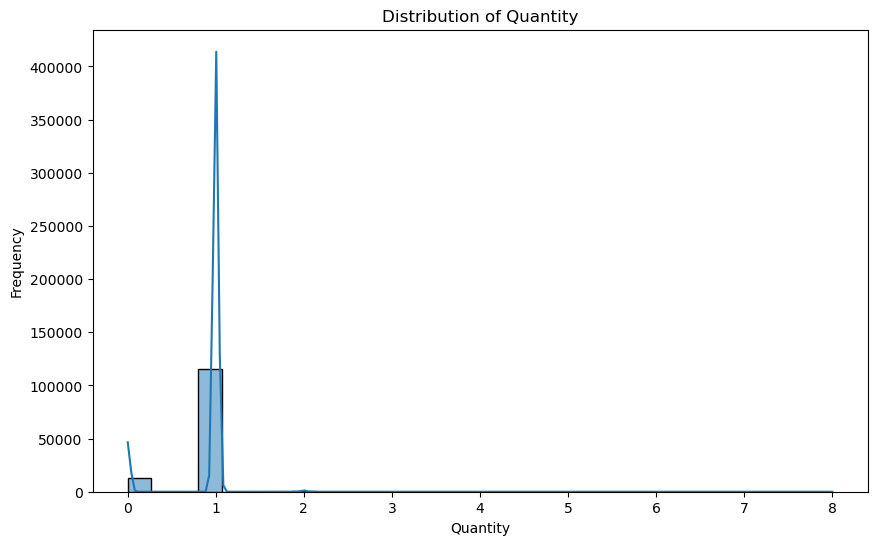

In [51]:
# Visualize the distribution of 'Price-INR'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price-INR'], bins=30, kde=True)
plt.title('Distribution of Price-INR')
plt.xlabel('Price-INR')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


## OUTLIERS

### Plotting the data Before and After Outliers Treatment

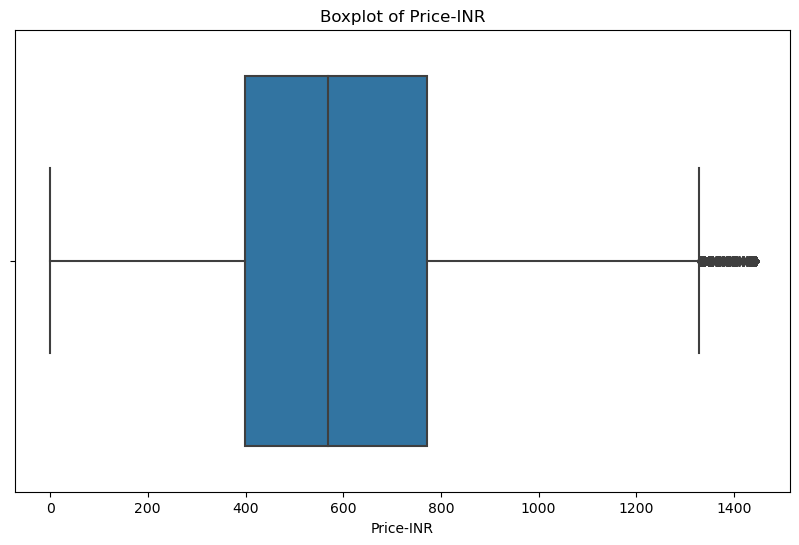

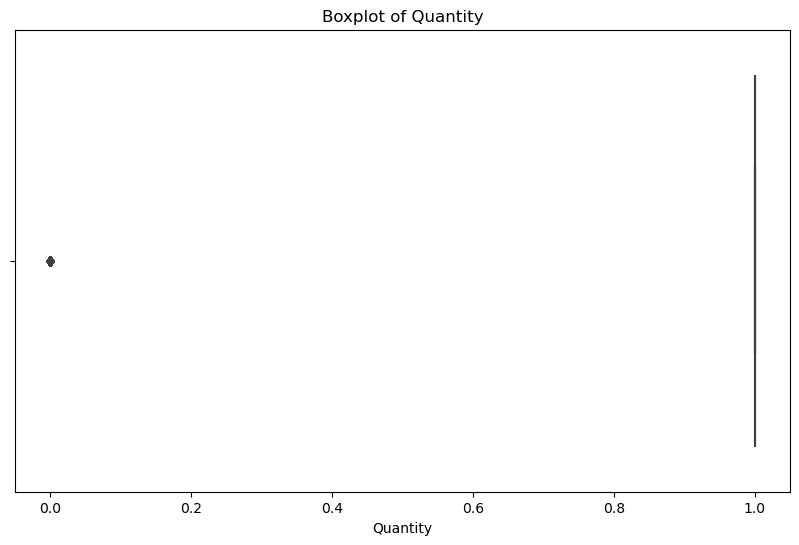

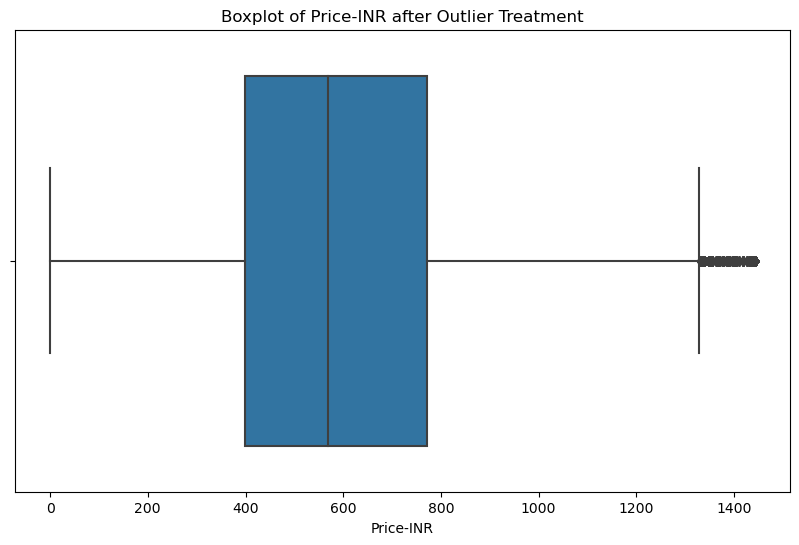

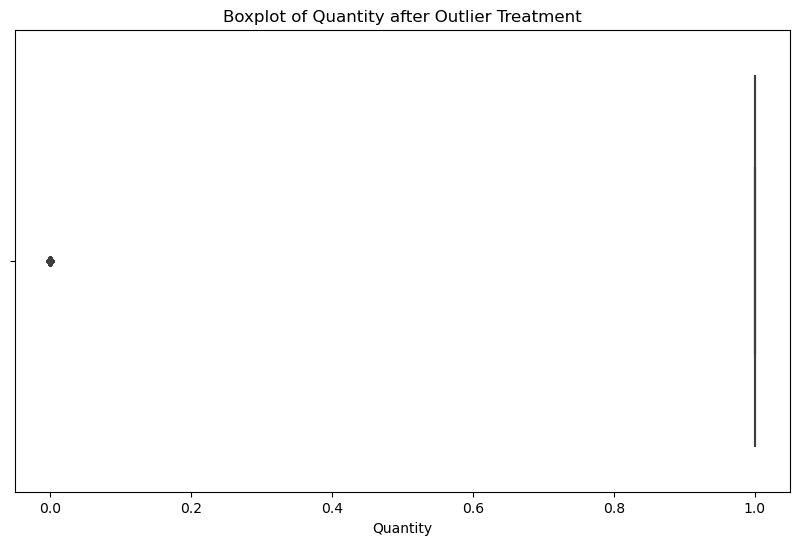

In [59]:
# Outlier detection for 'Price-INR' and 'Quantity'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price-INR'])
plt.title('Boxplot of Price-INR')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Treating outliers by capping them at the 99th percentile
price_cap = df['Price-INR'].quantile(0.99)
quantity_cap = df['Quantity'].quantile(0.99)

df['Price-INR'] = df['Price-INR'].apply(lambda x: min(x, price_cap))
df['Quantity'] = df['Quantity'].apply(lambda x: min(x, quantity_cap))

# Check the boxplots again after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price-INR'])
plt.title('Boxplot of Price-INR after Outlier Treatment')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity after Outlier Treatment')
plt.show()


In [62]:
df.describe()

,Quantity,Price-INR,B2B,Total
count,128810.000000,128810.000000,128810.000000,128810.000000
mean,0.900637,583.937746,0.006762,590.111303
std,0.299150,326.770598,0.081953,386.546903
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,399.000000,0.000000,399.000000
50%,1.000000,568.000000,0.000000,568.000000
75%,1.000000,771.000000,0.000000,771.000000
max,1.000000,1442.000000,1.000000,44672.000000


## Saving the data into new csv to start a new era of visulization 

In [83]:
df.to_csv('cleaned-df(2).csv', index=False)

___

In [17]:
df = pd.read_csv('cleaned-df(2).csv')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

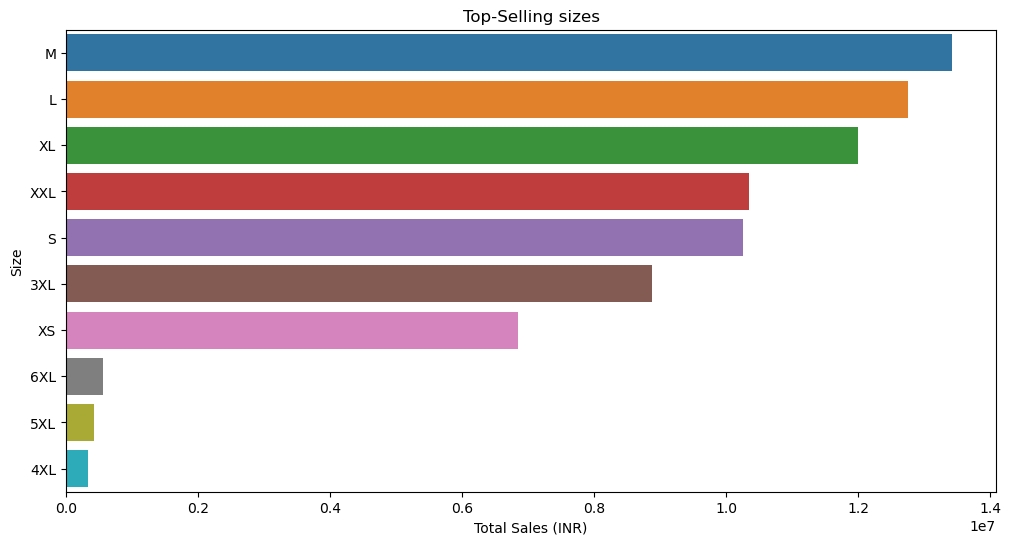

In [67]:
# Top-size categories
top_size = df.groupby('Size')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_size, x='Total', y='Size')
plt.title('Top-Selling sizes')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Size')
plt.show()

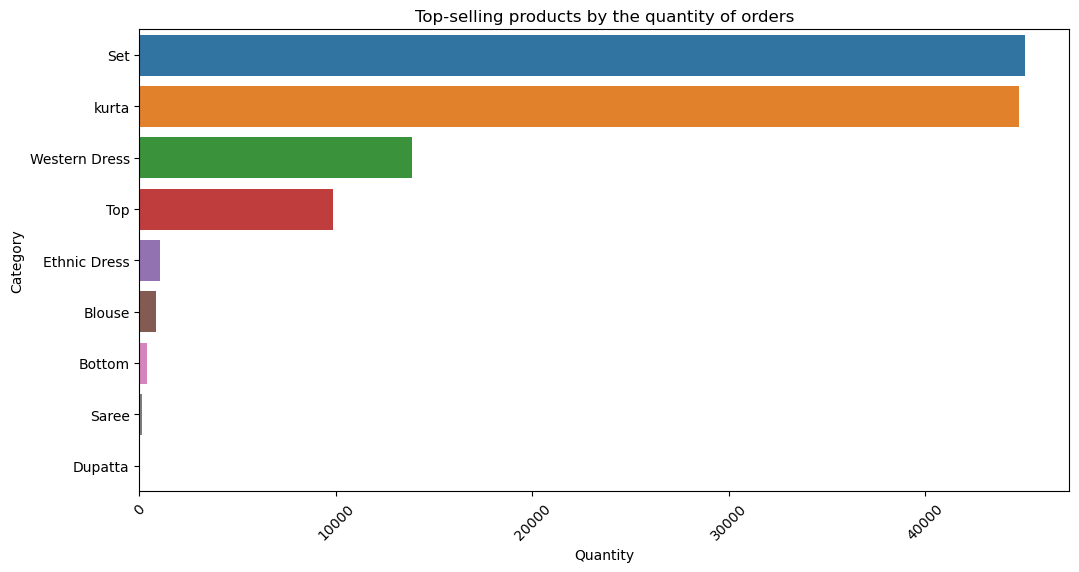

In [86]:
df_cat=df.groupby(['Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y='Category',x='Quantity', data=df_cat)
plt.xticks(rotation=45)
plt.title('Top-selling products by the quantity of orders')
plt.show()

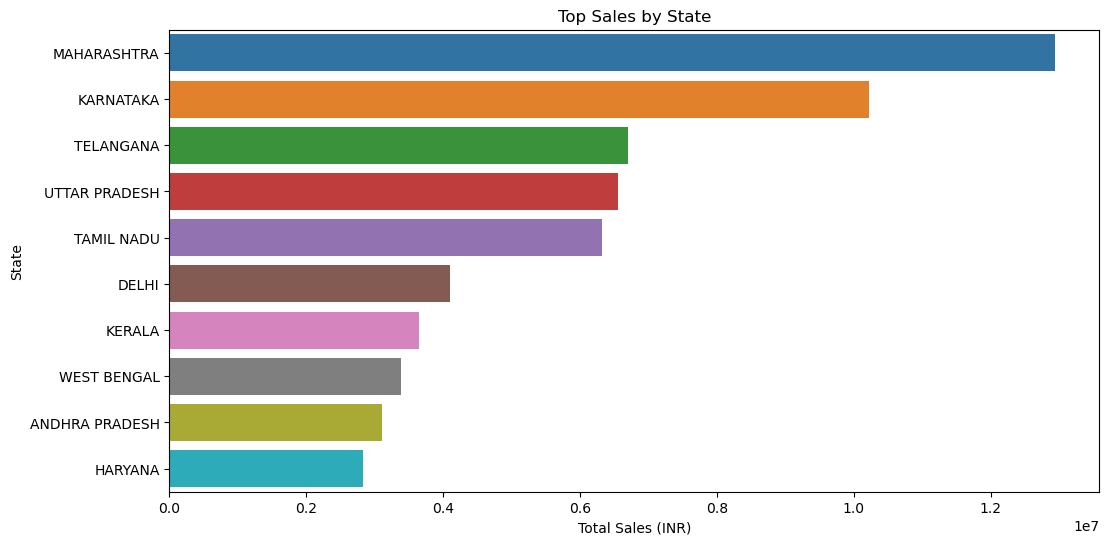

In [91]:
# Regional sales distributions
top_states = df.groupby('ship-state')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Total', y='ship-state')
plt.title('Top Sales by State')
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.show()

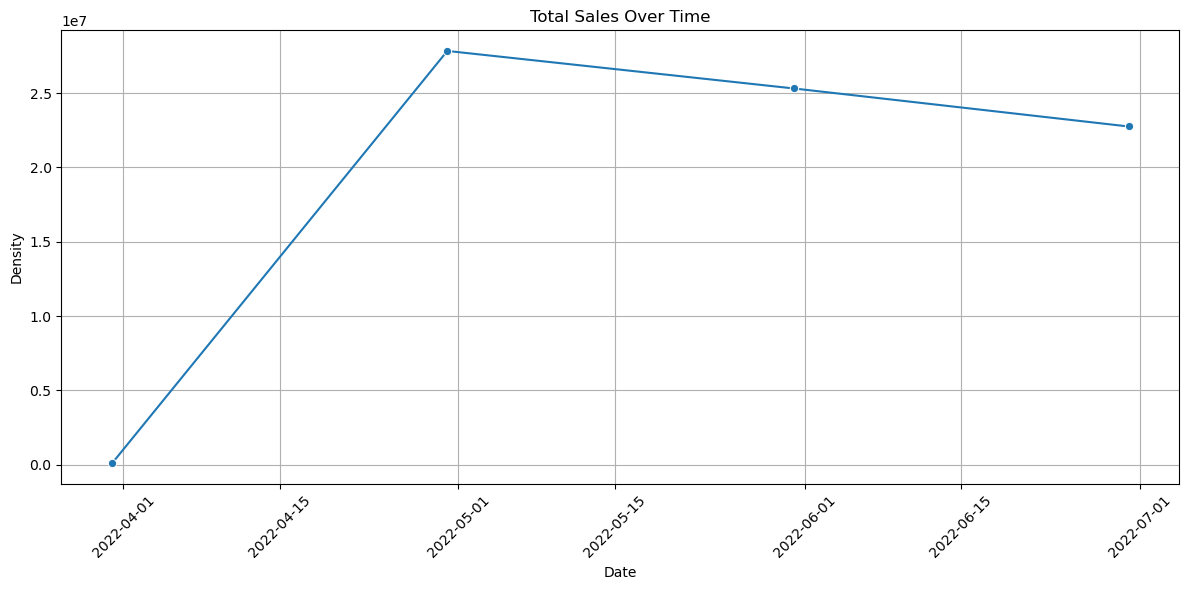

In [104]:
# Aggregate sales by Date (assuming daily data)
monthly_sales = df.resample('M', on='Date')['Total'].sum().reset_index()

# Plotting total sales over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=monthly_sales, marker='o')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

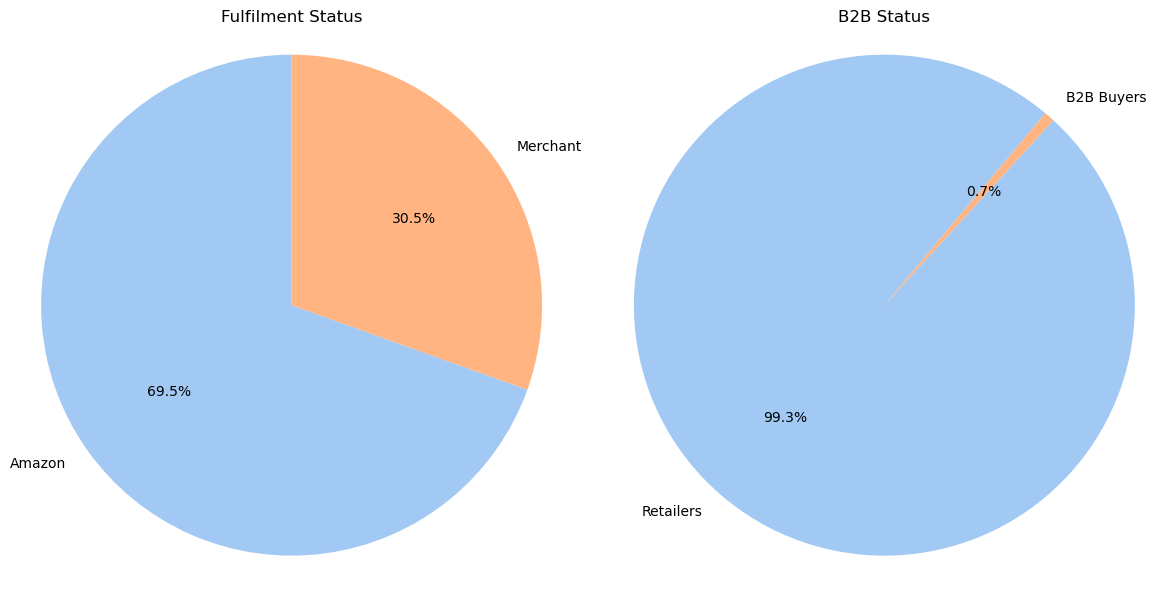

In [137]:
# Calculate value counts for Fulfilment and B2B columns
fulfilment_counts = df['Fulfilment'].value_counts()
B2B_counts = df['B2B'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot first pie chart (Fulfilment)
ax1.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax1.set_title('Fulfilment Status')
ax1.axis('equal')  # Ensure the pie chart is a circle

# Plot second pie chart (B2B)
ax2.pie(B2B_counts, labels=['Retailers', 'B2B Buyers'], autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
ax2.set_title('B2B Status')
ax2.axis('equal')  # Ensure the pie chart is a circle

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


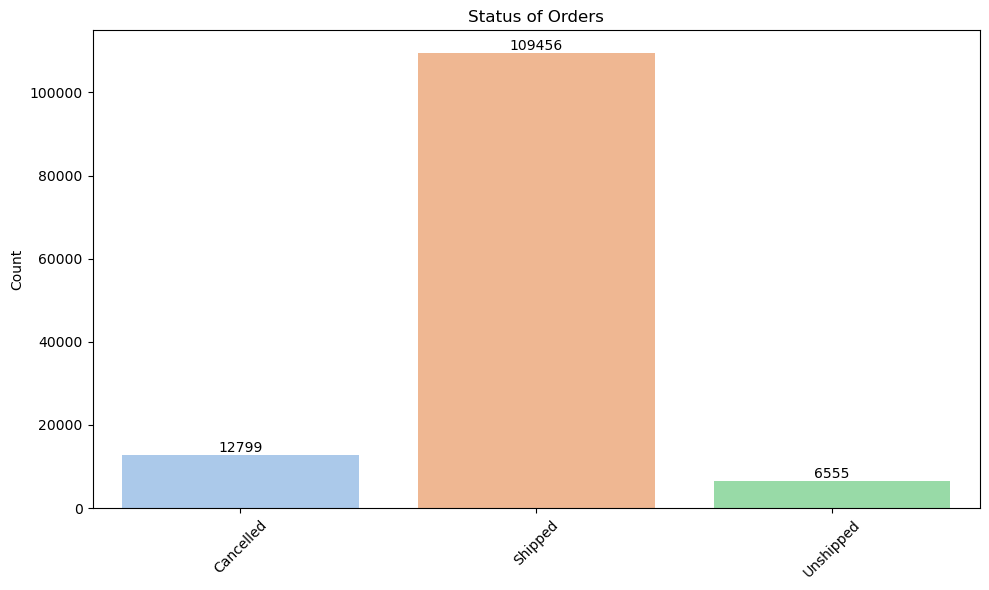

In [141]:
# Plot the second visualization
df1 = df.groupby('Courier-Status')['ID'].count()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1.values, palette='pastel', ax=ax)
plt.title('Status of Orders')
plt.xlabel(None)
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


# The Visulzations all in one cell 

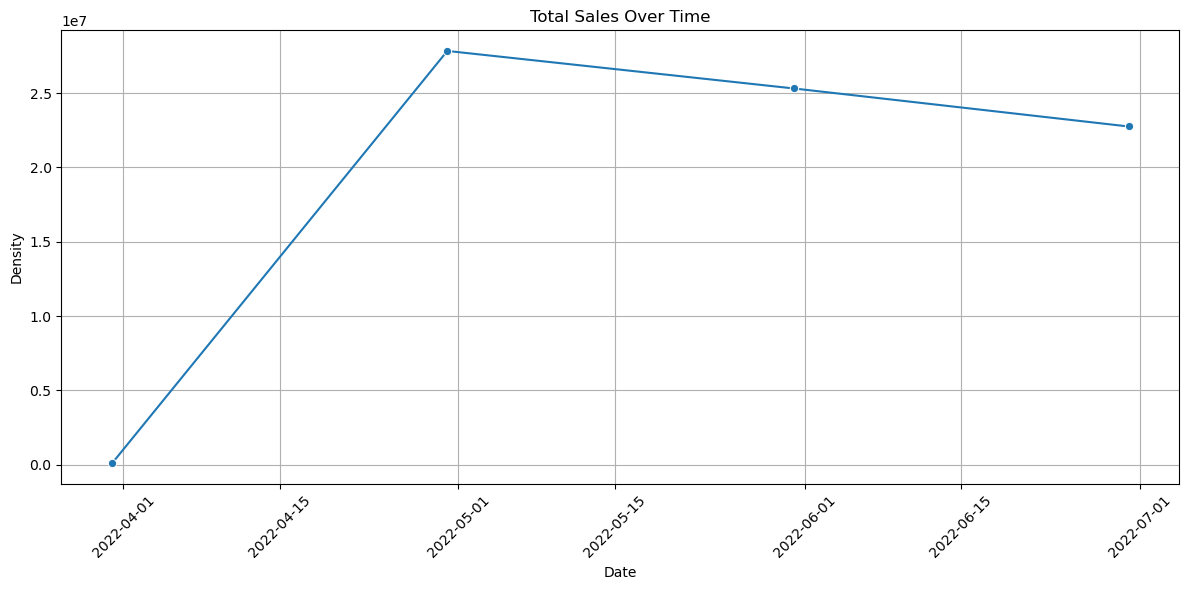

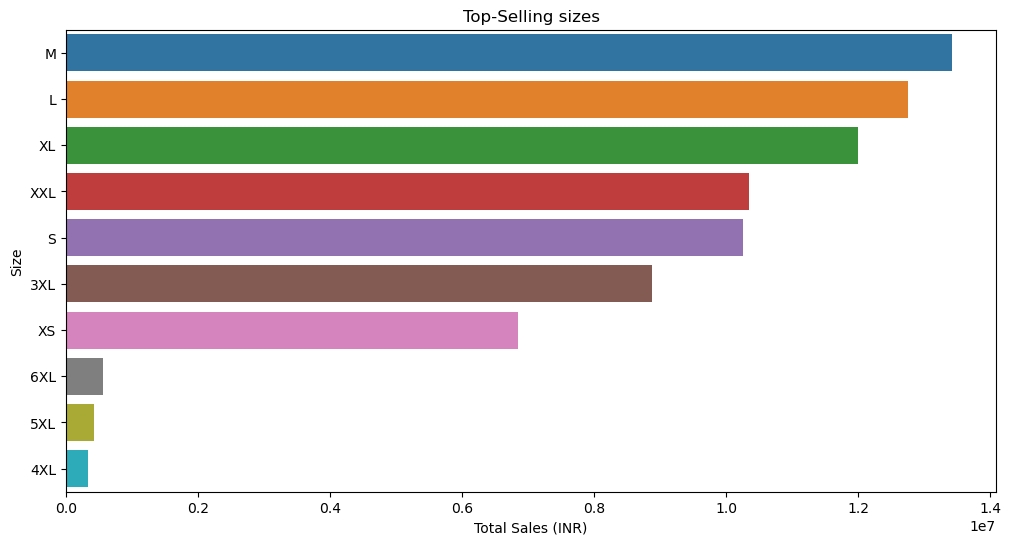

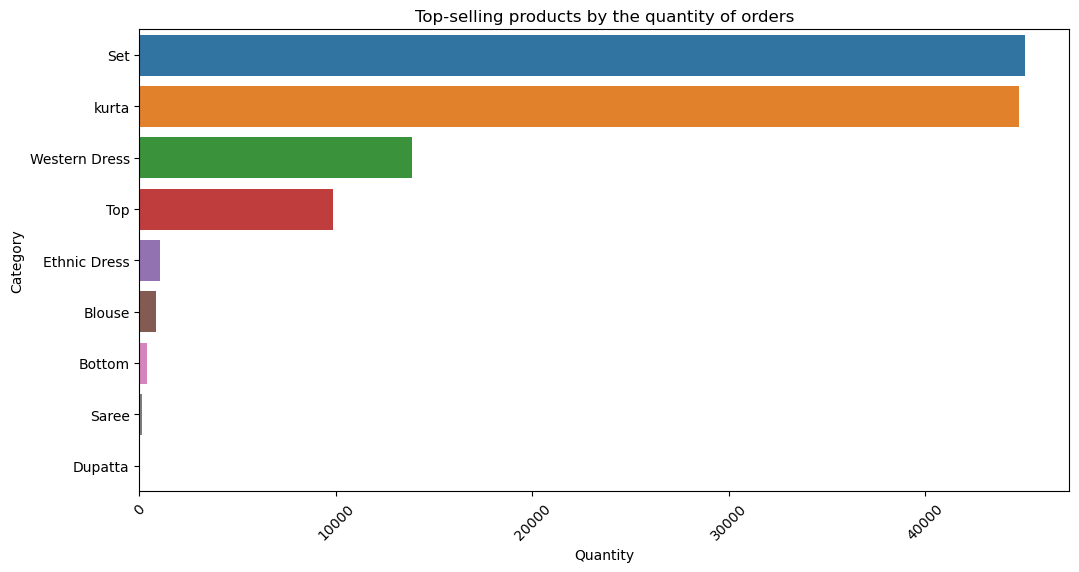

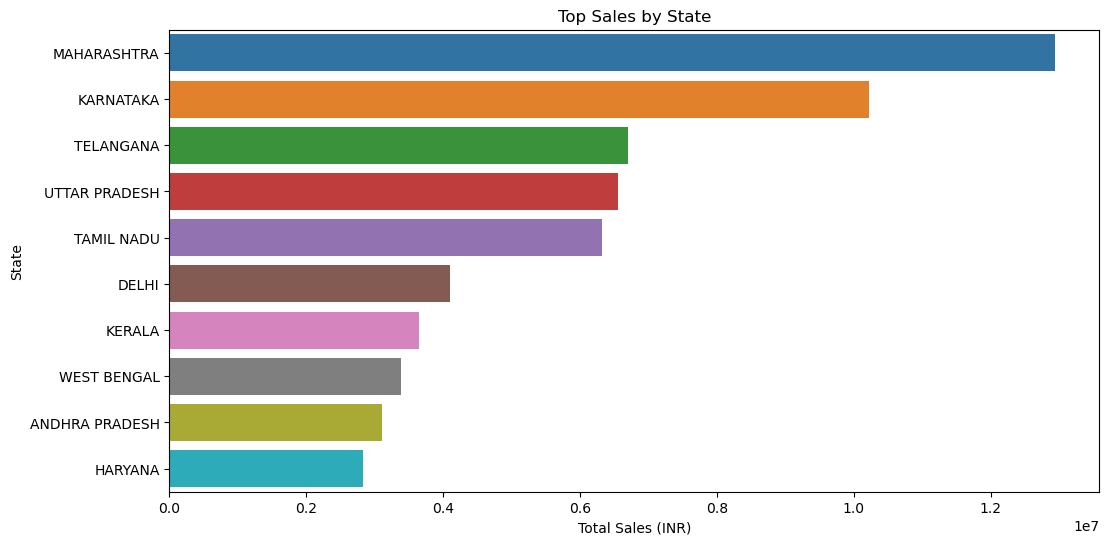

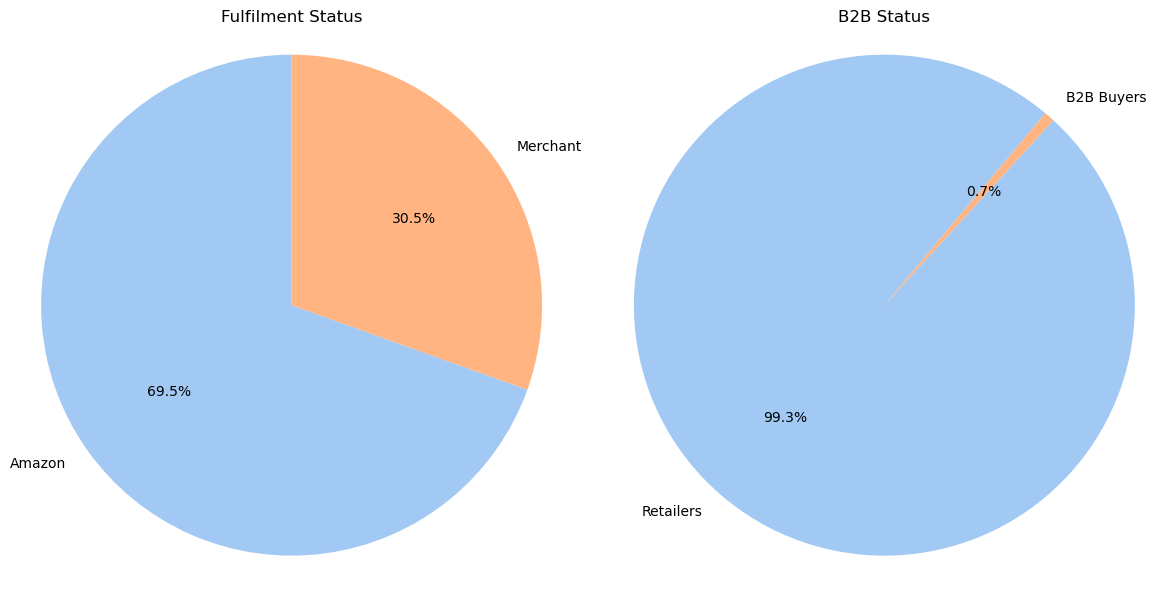

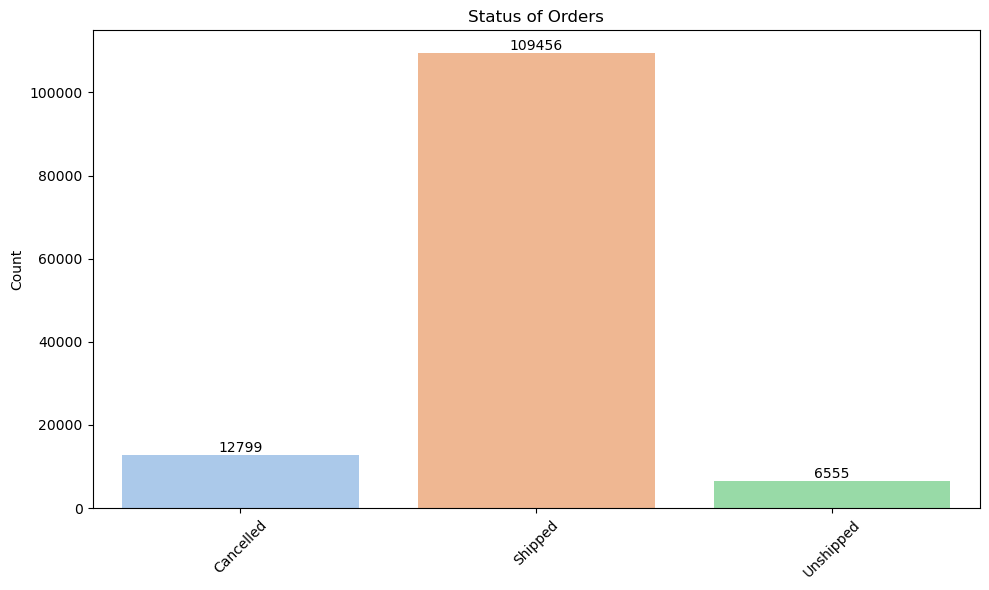

In [178]:
# Aggregate sales by Date (assuming daily data)
monthly_sales = df.resample('M', on='Date')['Total'].sum().reset_index()

# Plotting total sales over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=monthly_sales, marker='o')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top-size categories
top_size = df.groupby('Size')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_size, x='Total', y='Size')
plt.title('Top-Selling sizes')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Size')
plt.show()

df_cat=df.groupby(['Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y='Category',x='Quantity', data=df_cat)
plt.xticks(rotation=45)
plt.title('Top-selling products by the quantity of orders')
plt.show()

# Regional sales distributions
top_states = df.groupby('ship-state')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Total', y='ship-state')
plt.title('Top Sales by State')
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.show()

# Calculate value counts for Fulfilment and B2B columns
fulfilment_counts = df['Fulfilment'].value_counts()
B2B_counts = df['B2B'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot first pie chart (Fulfilment)
ax1.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax1.set_title('Fulfilment Status')
ax1.axis('equal')  # Ensure the pie chart is a circle

# Plot second pie chart (B2B)
ax2.pie(B2B_counts, labels=['Retailers', 'B2B Buyers'], autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
ax2.set_title('B2B Status')
ax2.axis('equal')  # Ensure the pie chart is a circle

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Plot the second visualization
df1 = df.groupby('Courier-Status')['ID'].count()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1.values, palette='pastel', ax=ax)
plt.title('Status of Orders')
plt.xlabel(None)
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


# Building Predictive Models

### Importing Required Libraries

In [124]:
# Encode the target variable 'Courier-Status' instead of 'Status'
le_courier_status = LabelEncoder()
df['Courier_Status_Encoded'] = le_courier_status.fit_transform(df['Courier-Status'])

# Features and new target variable
features = df[['Price-INR', 'Quantity', 'B2B', 'Total']]
target = df['Courier_Status_Encoded']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree Model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Model Evaluation
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg, average='weighted')
logreg_recall = recall_score(y_test, y_pred_logreg, average='weighted')

dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_precision = precision_score(y_test, y_pred_dtree, average='weighted')
dtree_recall = recall_score(y_test, y_pred_dtree, average='weighted')

(logreg_accuracy, logreg_precision, logreg_recall), (dtree_accuracy, dtree_precision, dtree_recall)


C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


((0.9504955619387728, 0.903712523630732, 0.9504955619387728),
 (0.9502885386745336, 0.9086739821397893, 0.9502885386745336))

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,mean_squared_error,accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

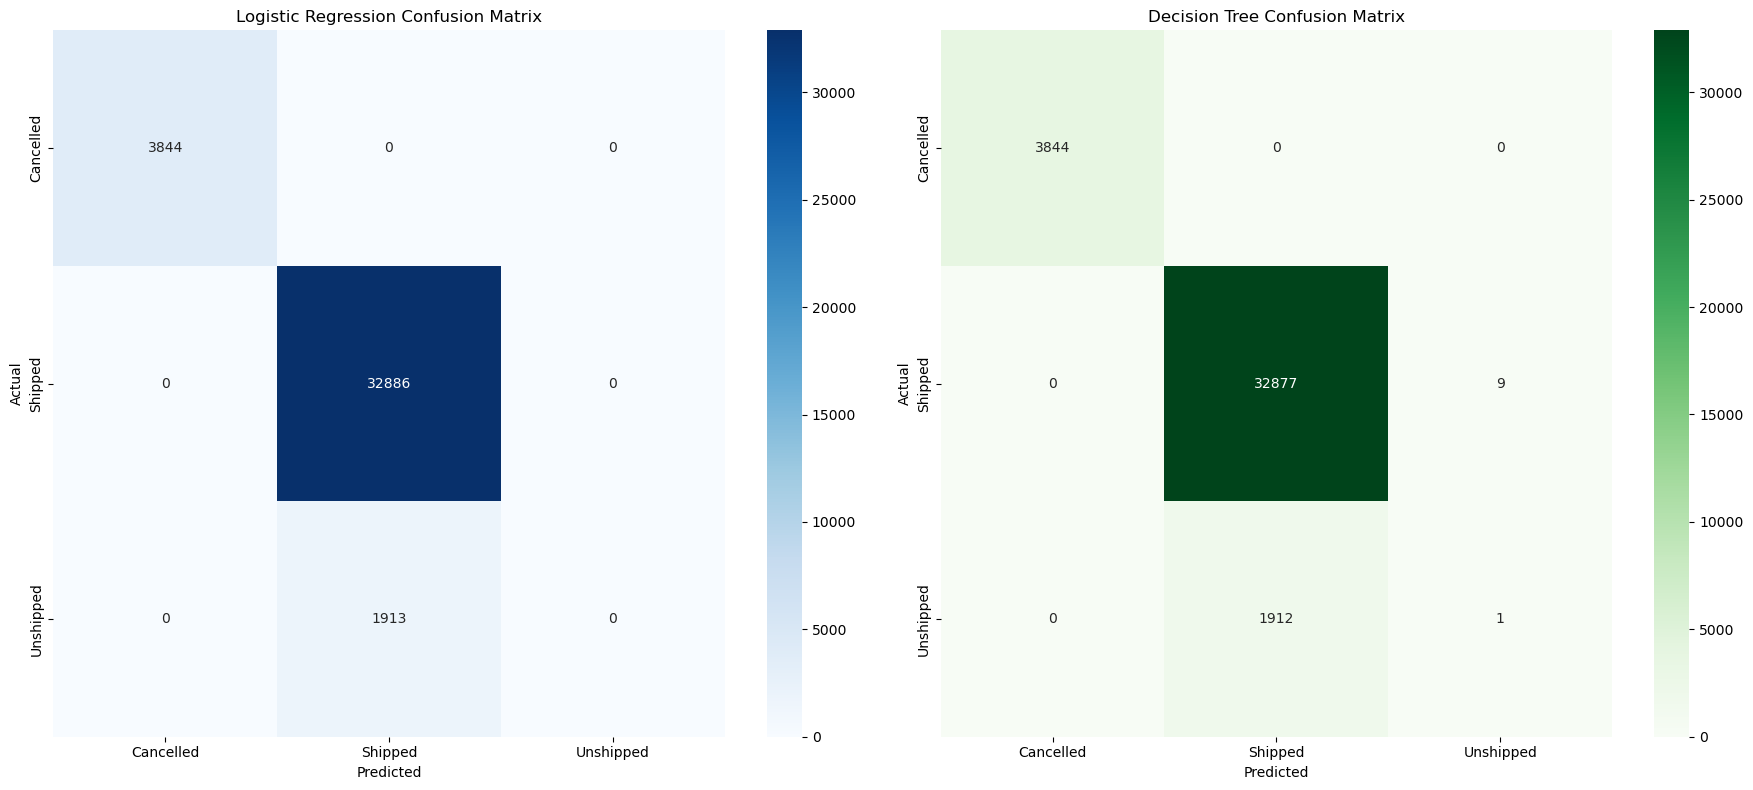

In [144]:
# Generate confusion matrices for both models
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)

# Get the labels for the confusion matrix
labels = le_courier_status.classes_

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', ax=ax[0], cmap='Blues', xticklabels=labels, yticklabels=labels)
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', ax=ax[1], cmap='Greens', xticklabels=labels, yticklabels=labels)
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# The Dashboard

In [214]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

top_sizes = df.groupby('Size')['Total'].sum().nlargest(10).reset_index()
top_categories = df.groupby('Category')['Total'].sum().nlargest(10).reset_index()
top_states = df.groupby('ship-state')['Total'].sum().nlargest(10).reset_index()


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Amazon Sales Dashboard"),
    
    dcc.Tabs(id="tabs", children=[
        dcc.Tab(label='Sales Trends', children=[
            dcc.Graph(
                id='monthly-sales',
                figure={
                    'data': [
                        {'x': monthly_sales['Month'], 'y': monthly_sales['Total'], 'type': 'line', 'name': 'Monthly Sales'},
                    ],
                    'layout': {
                        'title': 'Monthly Sales Trends'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Top Sizes', children=[
            dcc.Graph(
                id='top_size',
                figure={
                    'data': [
                        {'x': top_size['Total'], 'y': top_size['Size'], 'type': 'bar', 'orientation': 'h', 'name': 'Top sizes'},
                    ],
                    'layout': {
                        'title': 'Top-Selling sizes'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Top Categories', children=[
            dcc.Graph(
                id='top-categories',
                figure={
                    'data': [
                        {'x': top_categories['Total'], 'y': top_categories['Category'], 'type': 'bar', 'orientation': 'h', 'name': 'Top Categories'},
                    ],
                    'layout': {
                        'title': 'Top-Selling Categories'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Sales by State', children=[
            dcc.Graph(
                id='top-states',
                figure={
                    'data': [
                        {'x': top_states['Total'], 'y': top_states['ship-state'], 'type': 'bar', 'orientation': 'h', 'name': 'Top States'},
                    ],
                    'layout': {
                        'title': 'Top Sales by State'
                    }
                }
            )
        ])
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
